# Exploration de la classe `Polynomial` de Numpy

La classe [Polynomials](https://runebook.dev/fr/docs/numpy/reference/routines.polynomials) permet d'utiliser les polynômes comme des objets. Mais pour bien les utiliser, il faut comprendre l'esprit dans lequel cette extension a été crée. Écrire l'équation d'un polynômes et calculer ses valeurs ne présente aucune difficulté et ce n'est donc pas l'objectif principal de cette extension. Trouver les racines d'un polynôme est un sujet plus intéressant, mais il existe aussi d'autres méthodes efficaces pour le faire.

Cette extension est crée principalement dans l'esprit de faire des régressions polynomiales, c'est-à dire trouver le polynôme qui s'adapte le mieux à un jeux de données (x,y). Je vais donc présenter ici cette extension sous cet aspect et nous reviendrons sur le sujet des regressions polynomiales dans un [cahier dédié](../10_machine_learning/02_regression_multilineaire.ipynb).


(on trouvera aussi des aides sur la page de [runbook](https://runebook.dev/fr/docs/numpy/reference/routines.polynomials)).

## Présentation de l'objet Polynomial dans le contexte d'une régression

Je construis d'abord un jeu de données pour m'exercer : je pars d'un polynôme que je floute ensuite avec la fonction random. L'exercice est ensuite de retrouver ce polynôme (ou un polynôme approchant) à partir du nuage de points seul.

╭───┬─────┬───────┬───┬────────┬─────╮
│ x │   0 │ 2.5   │ 5 │  7.5   │  10 │
├───┼─────┼───────┼───┼────────┼─────┤
│ y │ -15 │ 1.875 │ 0 │ 73.125 │ 315 │
╰───┴─────┴───────┴───┴────────┴─────╯


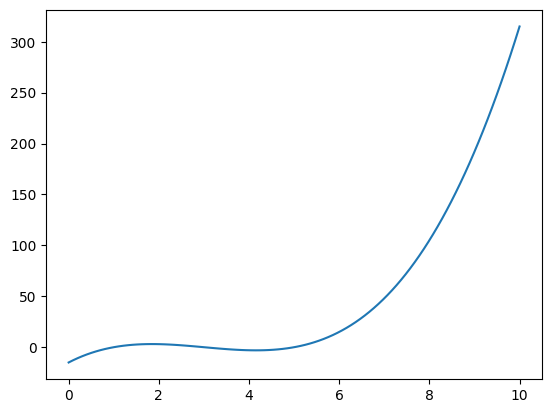

In [83]:
import numpy as np

# je construis le polynôme à partir de ses racines
def f(x):
    return (x-1)*(x-3)*(x-5)

x0 = np.linspace(0,10,100, endpoint=True)
# y0 = np.array([f(xi) for xi in x0])  # méthode classique qui fonctionne tout le temps
y0 = f(x0)  # méthode avancée qui fonctionne avec les ndarray de NumPy

# affichage de quelques points
xv = np.linspace(0,10,5)
yv = f(xv)
xv = np.hstack(('x',xv))
yv = np.hstack(('y',yv))
from tabulate import tabulate
print(tabulate([xv, yv], tablefmt='rounded_grid'))

# affichage du graphe
import matplotlib.pyplot as plt
plt.plot(x0, y0)
plt.show()


Maintenant on floute cette courbe.

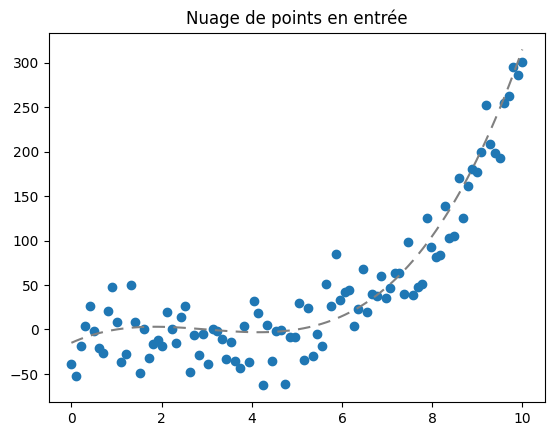

In [6]:
rng = np.random.default_rng(5)

nb_pts = len(x0)
xf = x0
coef = 30
yf = y0 + rng.normal(scale = coef, size = nb_pts)

plt.scatter(xf,yf)
plt.plot(x0, y0, dashes=[6,4], c='gray')
plt.title(f'Nuage de points en entrée')
plt.show()

Je me propose maintenant d'étudier ces points pour faire une régression polynomiale (et retrouver finalement le polynôme qui a servi a construire ces points).

Pour obtenir un polynôme dont le domaine est déduit des points d'entrée, il faut entrer le paramètre `domain=None` (sinon on tombe sur la valeur par défaut, c'est-à dire [-1, 1])

In [76]:
p1 = Polynomial.fit(xf, yf, deg=3, domain=None)

╭───┬─────────┬──────────┬──────────┬─────────┬─────────╮
│ x │   0     │  2.5     │  5       │  7.5    │  10     │
├───┼─────────┼──────────┼──────────┼─────────┼─────────┤
│ y │ -15.343 │ -8.18468 │ -4.53913 │ 70.8996 │ 293.437 │
╰───┴─────────┴──────────┴──────────┴─────────┴─────────╯


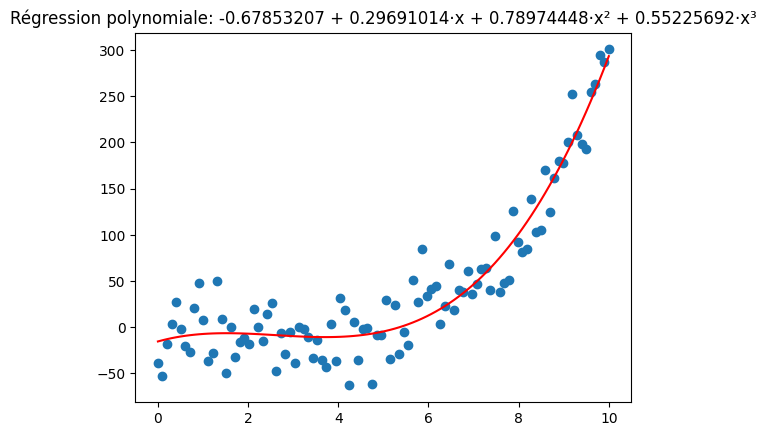

In [132]:
# affichage de quelque points dans une table
xv, yv = p1.linspace(5)
xv = np.hstack(('x',xv))
yv = np.hstack(('y',yv))
print(tabulate([xv, yv], tablefmt='rounded_grid'))

# affichage des graphes
x1,y1 = p1.linspace(100)
plt.scatter(xf,yf)                        # le nuage de point
plt.plot(x1,y1, color='red')            # la solution de regression
plt.title(f'Régression polynomiale: {P:unicode}')
plt.show()

## Mieux comprendre sur un cas simple

Pour mieux comprendre le fonctionnement de cette classe, je l'applique au polynôme simple $y = x^3$.

In [92]:
from numpy.polynomial import Polynomial

coef = (0,0,0,1)
P = Polynomial(coef)
print(f'{P:unicode}')   # pour visualiser l'équation du polynôme

0.0 + 0.0·x + 0.0·x² + 1.0·x³


La méthode [linspace](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.linspace.html#numpy.polynomial.polynomial.Polynomial.linspace) fait partie des différentes [méthodes](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial) de cet objet et permet de monter un graphique rapidement.

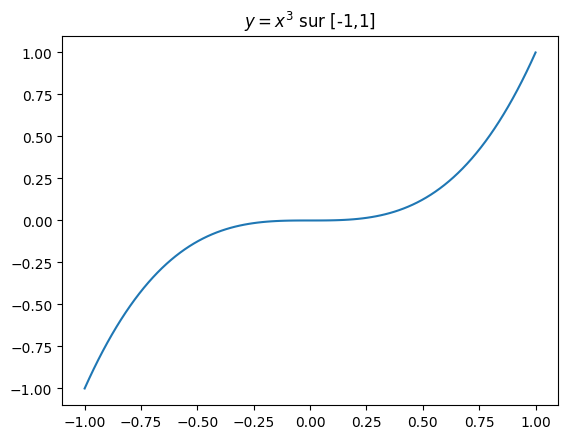

In [93]:
import matplotlib.pyplot as plt

x,y = P.linspace()
plt.plot(x,y)
plt.title(f'$y = x^3$ sur [-1,1]')
plt.show()

# Les paramètres `domain` et `window`.

Les deux paramètres optionnels `domain` et `window` sont déroutants car ils relativisent la définition des coefficients donnés pour créer le polynôme. Ces exemples vont permettre de mieux les comprendre.

Le paramètre optionnel `domain` définit le domaine de la série des abscisses, mais sans impacter les ordonnées qui restent inchangée et toujours calculées sur la fenêtre par défaut `[-1, 1]`.

Si on l'affiche, le polynôme apparait translaté.

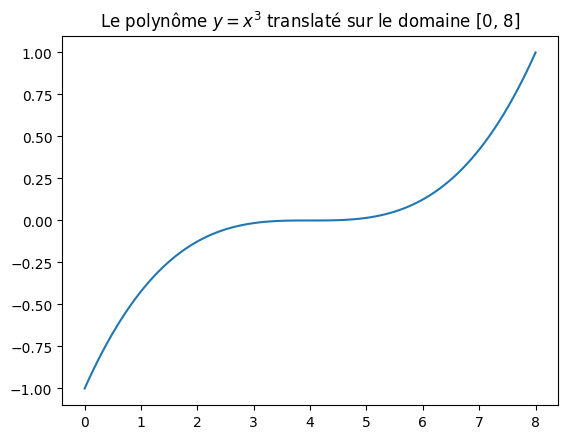

In [102]:
domaine = [0,8]  # adapter ici le domaine
P2 = Polynomial(coef, domain=domaine)

x,y = P2.linspace()
plt.plot(x,y)
plt.title(f'Le polynôme $y = x^3$ translaté sur le domaine {domaine}')
plt.show()

La fonction polynôme a été changée par cette translation.

In [105]:
P2(4)

0.0

Si maintenant, je fixe une fenêtre, les valeurs prises par le polynôme vont grandir, mais la domaine reste à la valeur par défaut `[-1, 1]`.

Text(0.5, 1.0, 'Le polynôme $y=x^3$ calculé sur la fenêtre [0, 10], mais x restant dans [-1,1]')

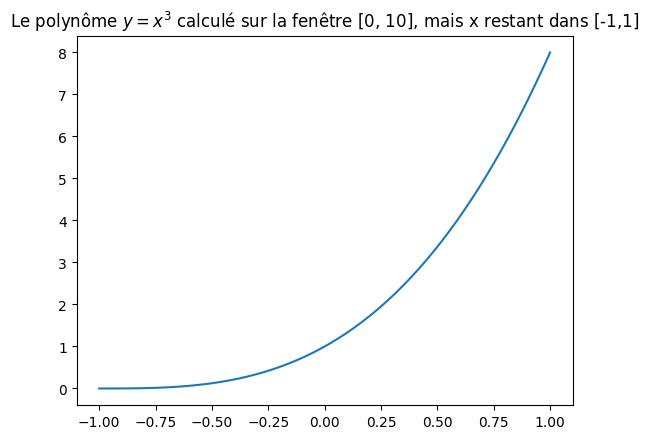

In [104]:
P3 = Polynomial(coef, window=[0,2])

x,y = P3.linspace()
plt.plot(x,y)
plt.title(f'Le polynôme $y=x^3$ calculé sur la fenêtre [0, 10], mais x restant dans [-1,1]')

Le polynôme a aussi été changé.

In [106]:
P3(0)

1.0

Par exemple si nous voulons représenter notre polynôme $y=x^3$ sur l'intervalle `[0,5]` , mais avec des valeurs allant sur `[-8,8]`, on choisira la fenêtre `[-2,2]`. C'est-à dire qu'il faut savoir inverser les valeurs extrémales...

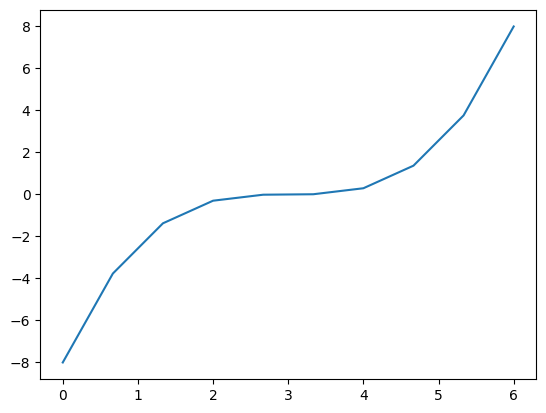

In [88]:
P4 = Polynomial(coef, domain = [0,6], window=[-2,2])

x,y = P4.linspace(10)

plt.plot(x,y)
plt.show()

La méthode [mapparms](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.mapparms.html#numpy.polynomial.polynomial.Polynomial.mapparms) permet de passer des points du domaine aux points de la fenêtre.

In [89]:
off,scl = P4.mapparms()
yy = off + scl * x
yy

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

On peut reconstituer la courbe avec ces paramètres et les coefficients si on en connait 

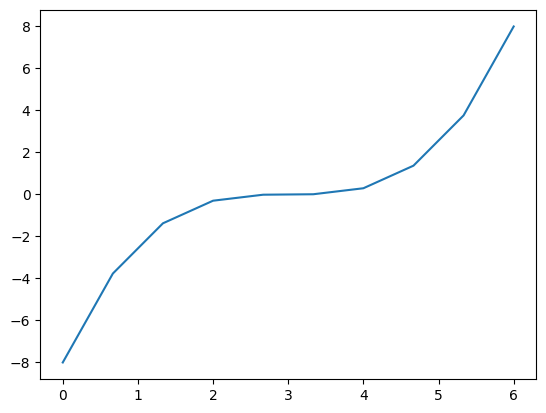

In [90]:
def P4r(x):
    return (off + scl*x)**3

y = [P4r(xx) for xx in x]

plt.plot(x,y)
plt.show()

Attention à l'utilisation de cette extension Polynomial. En fait on en comprend mieux la logique en partant des polynômes de Tchebichev. Il s'agit de retrouver les fréquences d'un signal pour le reconstituer ensuite avec les séries de Tchebichev. La taille du domaine et de la fenêtre sont moins importants, car on recherche avant tout les fréquences.